In [2]:
import pandas as pd
import numpy as np

import matplotlib
from matplotlib import font_manager, rc
import platform

import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('https://s3.ap-northeast-2.amazonaws.com/data10902/petition/petition.csv', parse_dates=['start', 'end'])

In [6]:
df.shape

(395547, 8)

In [7]:
df.head(5)

,article_id,start,end,answered,votes,category,title,content
0,21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...
1,22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...
2,23,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."
3,24,2017-08-19,2017-08-26,0,53,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...
4,25,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395547 entries, 0 to 395546
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   article_id  395547 non-null  int64         
 1   start       395547 non-null  datetime64[ns]
 2   end         395547 non-null  datetime64[ns]
 3   answered    395547 non-null  int64         
 4   votes       395547 non-null  int64         
 5   category    395547 non-null  object        
 6   title       395547 non-null  object        
 7   content     395546 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 19.6+ MB


In [9]:
df.describe()

,article_id,answered,votes
count,395547.000000,395547.000000,3.955470e+05
mean,251608.934635,0.000073,1.501188e+02
std,153219.216242,0.008562,4.802583e+03
min,21.000000,0.000000,0.000000e+00
25%,115236.500000,0.000000,2.000000e+00
50%,253682.000000,0.000000,5.000000e+00
75%,386137.500000,0.000000,1.500000e+01
max,517122.000000,1.000000,1.192049e+06


In [10]:
df_20 = df.loc[df['votes'] > 200000]
df_20.shape

(80, 8)

In [11]:
df_20.category.value_counts()

인권/성평등         24
안전/환경          10
기타              8
정치개혁            8
문화/예술/체육/언론     7
반려동물            4
외교/통일/국방        4
육아/교육           3
교통/건축/국토        3
보건복지            3
성장동력            2
경제민주화           2
미래              1
행정              1
Name: category, dtype: int64

In [12]:
df_20[['title', 'content']].head(3)

,title,content
1752,청소년이란 이유로 보호법을 악용하는 잔인무도한 청소년들이 늘어나고있습니다. 반드시 ...,안녕하십니까. 청소년보호법이란 명목하에 나쁜짓을 일삼는 청소년들이 너무나 많아지고 ...
10894,조두순 출소반대,제발 조두순 재심다시해서 무기징역으로 해야됩니다!!!
18111,낙태죄 폐지와 자연유산 유도약(미프진) 합법화 및 도입을 부탁드립니다.,안녕하세요. 존경하는 대통령님 의원님\n낙태죄 폐지를 청원합니다.\n현재 대한민국은...


In [13]:
df_20.sort_values(by='votes',ascending=False).head()

,article_id,start,end,answered,votes,category,title,content
313314,408609,2018-10-17,2018-11-16,0,1192049,안전/환경,강서구 피시방 살인 사건. 또 심신미약 피의자입니다.,2018년 10월 14일 엊그제 일어난 강서구 피시방 살인사건에 대한 청원입니다.\...
208597,269548,2018-06-13,2018-07-13,0,714875,외교/통일/국방,"제주도 불법 난민 신청 문제에 따른 난민법, 무사증 입국, 난민신청허가 폐지/개헌 ...",2012년 난민법 제정으로 인해 외국인은 한달 무비자로 입국할 수 있으나 난민신청자...
10894,10949,2017-09-06,2017-12-05,1,615354,미래,조두순 출소반대,제발 조두순 재심다시해서 무기징역으로 해야됩니다!!!
118970,142600,2018-02-19,2018-03-21,1,614127,문화/예술/체육/언론,"김보름, 박지우 선수의 자격박탈과 적폐 빙상연맹의 엄중 처벌을 청원합니다","오늘 여자 단체전 팀추월에서 김보름, 박지우 선수는 팀전인데도 불구하고 개인의 영달..."
183791,230552,2018-05-11,2018-06-10,1,419006,인권/성평등,여성도 대한민국 국민입니다. 성별 관계없는 국가의 보호를 요청합니다.,최근 홍대 누드크로키 모델의 불법촬영 사건이 있었습니다.\n사건은 굉장히 빠르게 처...


In [14]:
df['answer'] = (df['votes'] > 200000) == 1
df.shape

(395547, 9)

In [15]:
df['answer'] = df['answer'].astype('int')

In [16]:
df['answer_diff'] = df['answer'] - df['answered']
df['answer_diff'].sum()

51

In [20]:
df['start_year']=df['start'].dt.year
df['start_month'] = df['start'].dt.month
df['start_day'] = df['start'].dt.day
df['start_hour'] = df['start'].dt.hour
df['start_dow'] = df['start'].dt.dayofweek

In [21]:
#1. 연도별 청원 수
category = pd.DataFrame(df['category'].value_counts()).reset_index()
category.columns = ['category', 'counts']
category

,category,counts
0,정치개혁,62750
1,기타,48682
2,인권/성평등,34993
3,안전/환경,30638
4,교통/건축/국토,28184
5,외교/통일/국방,26626
6,육아/교육,25537
7,보건복지,24848
8,일자리,23225
9,행정,20268


In [22]:
start_df = pd.DataFrame(df['start_year'].value_counts()).reset_index()
start_df.columns = ['start_year', 'counts']
start_df.sort_values('start_year',ascending=True)
start_df.head()

,start_year,counts
0,2018,299565
1,2017,72119
2,2019,23863


c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count')

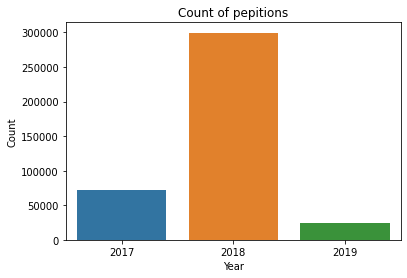

In [23]:
import seaborn as sns

df_20['year'] = df_20['start'].dt.year

ax = plt.subplots()
ax = sns.countplot('start_year',data=df)
ax.set_title('Count of pepitions')
ax.set_xlabel('Year')
ax.set_ylabel('Count')

# 2018년이 299565건, 2017년이 72119건, 2019년 23863건 순으로 2018년에 청원 수가 가장 많다.

c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count')

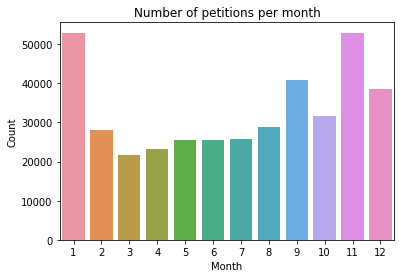

In [33]:
#2. 월별 청원 수
ax = plt.subplots()
ax = sns.countplot('start_month',data=df)
ax.set_title('Number of petitions per month')
ax.set_xlabel('Month')
ax.set_ylabel('Count')

c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


([<matplotlib.axis.XTick at 0x4b16cb0>,
 [Text(0, 0, 'Mon'),
  Text(1, 0, 'Tue'),
  Text(2, 0, 'Wed'),
  Text(3, 0, 'Thur'),
  Text(4, 0, 'Fri'),
  Text(5, 0, 'Sat'),
  Text(6, 0, 'Sun')])

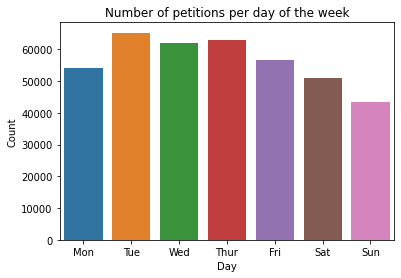

In [24]:
#3. 요일별 청원 수
ax = plt.subplots()
ax = sns.countplot('start_dow',data=df)
ax.set_title('Count of petitions per day of the week')
ax.set_xlabel('Day')
ax.set_ylabel('Count')
plt.xticks(np.arange(7),labels=['Mon','Tue','Wed','Thur','Fri','Sat','Sun'])

# 평일보다 주말에 청원 수가 적은 경향이 있다.

Text(0, 0.5, 'Votes')

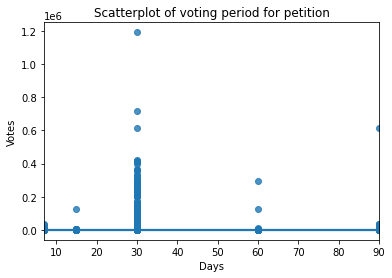

In [31]:
#4. 청원의 투표기간
df['T']=df['end']-df['start']
df['days']=df['T'].dt.days  
ax= sns.regplot(x='days',y='votes',data=df)
ax.set_title('Scatterplot of voting period for petition')
ax.set_xlabel('Days')
ax.set_ylabel('Votes')

# 대부분의 청원의 투표기간이 30일이다.

In [34]:
#5. 20만 건 이상인 청원 중 답변을 받은 청원의 카테고리 분포
answer_df = df['answer'] == 1
answered_df = df['answered'] == 1
answer20_df = df[answer_df & answered_df]
answer20_df


,article_id,start,end,answered,votes,category,title,content,answer,answer_diff,start_year,start_month,start_day,start_hour,start_dow,T,days
1752,1785,2017-09-03,2017-11-02,1,296330,인권/성평등,청소년이란 이유로 보호법을 악용하는 잔인무도한 청소년들이 늘어나고있습니다. 반드시 ...,안녕하십니까. 청소년보호법이란 명목하에 나쁜짓을 일삼는 청소년들이 너무나 많아지고 ...,1,0,2017,9,3,0,6,60 days,60
10894,10949,2017-09-06,2017-12-05,1,615354,미래,조두순 출소반대,제발 조두순 재심다시해서 무기징역으로 해야됩니다!!!,1,0,2017,9,6,0,2,90 days,90
18111,18278,2017-09-30,2017-10-30,1,235372,인권/성평등,낙태죄 폐지와 자연유산 유도약(미프진) 합법화 및 도입을 부탁드립니다.,안녕하세요. 존경하는 대통령님 의원님\n낙태죄 폐지를 청원합니다.\n현재 대한민국은...,1,0,2017,9,30,0,5,30 days,30
25032,26024,2017-11-04,2017-12-04,1,216774,안전/환경,'주취감형(술을 먹으면 형벌 감형)' 폐지를 건의(청원)합니다.,"'주취감형'이란, 술을 먹고 범행을 저지를 때, 심신미약 (이성이 없고 우발적)이라...",1,0,2017,11,4,0,5,30 days,30
43992,45581,2017-11-17,2017-12-17,1,281985,보건복지,"권역외상센터 (이국종 교수님) 추가적, 제도적, 환경적, 인력 지원","청원사항)\n중증외상분야의 추가적, 제도적, 환경적, 인력 지원 방안마련\n현 의료...",1,0,2017,11,17,0,4,30 days,30
47285,49083,2017-11-24,2017-12-24,1,211064,기타,"전안법. 18살, 미성년자에게 정부가 직접 찍어주는 범죄자 낙인!","3년 이하의 징역, 또는3천만원 이하의 벌금. 혹은 500만원 이하의 과태료.\n설...",1,0,2017,11,24,0,4,30 days,30
54896,57132,2017-12-03,2018-01-02,1,255554,성장동력,전안법 합리적으로 개정 또는 폐지해주세요.(소상공인 소비자 모두 죽는법안입니다.),2017년 1월 28일부터 시행되는 법령으로 국가기술표준원에서 관리하는 전기제품에만...,1,0,2017,12,3,0,6,30 days,30
70744,76020,2017-12-28,2018-01-27,1,228295,성장동력,<가상화폐규제반대> 정부는 국민들에게 단 한번이라도 행복한 꿈을 꾸게 해본적 있습니까?,저는 정부에게 묻고 싶습니다.\n정부는 단 한번이라도 우리 국민들에게 행복한 꿈을 ...,1,0,2017,12,28,0,3,30 days,30
73197,79162,2018-01-03,2018-02-02,1,233842,인권/성평등,미성년자 성폭행 형량 올려주세요 종신형원합니다,또 창원에서 조두순사건과 같은 사건이 발생했네요\n술먹어 심신이 미약하신 50대 대...,1,0,2018,1,3,0,2,30 days,30
74640,81026,2018-01-06,2018-02-05,1,213219,인권/성평등,초.중.고 학교 페미니즘교육 의무화,아직 판단이 무분별한 어린학생들이 학교에서 여성비하적요소가 들어있는 단어들을 아무렇...,1,0,2018,1,6,0,5,30 days,30


In [36]:
answer20_cat = pd.DataFrame(answer20_df.category.value_counts()).reset_index()
answer20_cat.columns = ['category', 'counts']
answer20_cat

,category,counts
0,인권/성평등,9
1,문화/예술/체육/언론,4
2,안전/환경,2
3,정치개혁,2
4,교통/건축/국토,2
5,보건복지,2
6,성장동력,2
7,기타,1
8,육아/교육,1
9,미래,1


Text(0, 0.5, 'Counts')

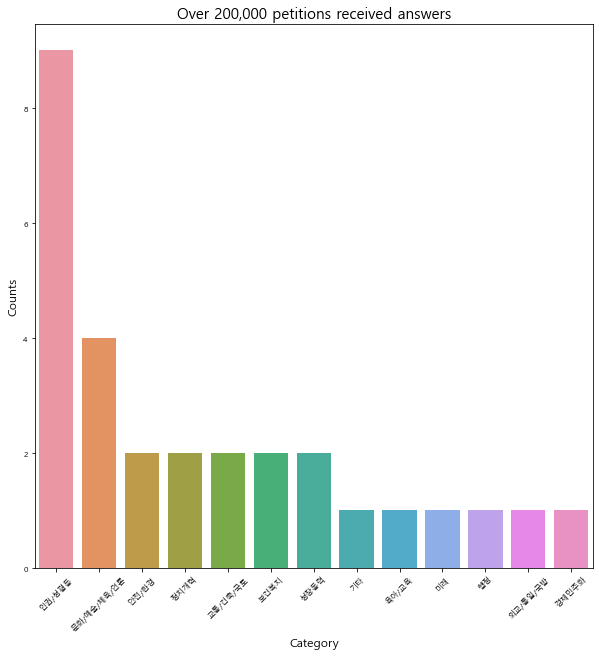

In [48]:
import matplotlib.font_manager as fm
path = 'C:/temp/NanumBarunGothic.ttf'
plt.rcParams['font.family']='NanumBarunGothic'
plt.rc('font', family='Malgun Gothic')

ax = plt.subplots(figsize=(10,10))
ax = sns.barplot(x='category', y='counts', data=answer20_cat)
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
ax.set_title('Over 200,000 petitions received answers', fontsize=15)
ax.set_xlabel('Category', fontsize=12)
ax.set_ylabel('Counts', fontsize=12)